In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
np.random.seed(42)

In [3]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')

Problem Faced: Didn't use a separator initially

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1. Few Missing values
2. Few object data-types
3. Dt_Customer not datetime

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [7]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [8]:
# Assuming df is your DataFrame and 'dt_Customer' is the column you want to convert
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


In [9]:
df['Age']=2024-df['Year_Birth']
df['Age'].head()

0    67
1    70
2    59
3    40
4    43
Name: Age, dtype: int64

In [10]:
df.drop("Year_Birth",axis=1,inplace=True)

In [11]:
d1=max(df['Dt_Customer'])

In [12]:
df['joined_customer']=d1-df['Dt_Customer']
df['joined_customer'].head()

0   663 days
1   113 days
2   312 days
3   139 days
4   161 days
Name: joined_customer, dtype: timedelta64[ns]

In [13]:
df['spent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['spent'].head()

0    1617
1      27
2     776
3      53
4     422
Name: spent, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2216 non-null   int64          
 1   Education            2216 non-null   object         
 2   Marital_Status       2216 non-null   object         
 3   Income               2216 non-null   float64        
 4   Kidhome              2216 non-null   int64          
 5   Teenhome             2216 non-null   int64          
 6   Dt_Customer          2216 non-null   datetime64[ns] 
 7   Recency              2216 non-null   int64          
 8   MntWines             2216 non-null   int64          
 9   MntFruits            2216 non-null   int64          
 10  MntMeatProducts      2216 non-null   int64          
 11  MntFishProducts      2216 non-null   int64          
 12  MntSweetProducts     2216 non-null   int64          
 13  MntGoldProds         22

Eduacation and marital status remain as objects

In [15]:
print(df['Education'].value_counts(),'\n')
print(df['Marital_Status'].value_counts(),'\n')

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



In [16]:
df.drop("Dt_Customer",axis=1,inplace=True)

In [17]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2216 non-null   int64          
 1   Education            2216 non-null   object         
 2   Marital_Status       2216 non-null   object         
 3   Income               2216 non-null   float64        
 4   Kidhome              2216 non-null   int64          
 5   Teenhome             2216 non-null   int64          
 6   Recency              2216 non-null   int64          
 7   MntWines             2216 non-null   int64          
 8   MntFruits            2216 non-null   int64          
 9   MntMeatProducts      2216 non-null   int64          
 10  MntFishProducts      2216 non-null   int64          
 11  MntSweetProducts     2216 non-null   int64          
 12  MntGoldProds         2216 non-null   int64          
 13  NumDealsPurchases    22

In [18]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Kidhome"] + df["Teenhome"]
df["Family_Size"].head()

C:\Users\shikh\AppData\Local\Temp\ipykernel_1776\1929719719.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Kidhome"] + df["Teenhome"]


0    1
1    3
2    2
3    3
4    3
Name: Family_Size, dtype: int64

In [19]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2212 non-null   int64          
 1   Education            2212 non-null   object         
 2   Marital_Status       2212 non-null   object         
 3   Income               2212 non-null   float64        
 4   Kidhome              2212 non-null   int64          
 5   Teenhome             2212 non-null   int64          
 6   Recency              2212 non-null   int64          
 7   MntWines             2212 non-null   int64          
 8   MntFruits            2212 non-null   int64          
 9   MntMeatProducts      2212 non-null   int64          
 10  MntFishProducts      2212 non-null   int64          
 11  MntSweetProducts     2212 non-null   int64          
 12  MntGoldProds         2212 non-null   int64          
 13  NumDealsPurchases    22

In [21]:
df["Living_With"] = df["Living_With"].replace({"Alone": 0, "Partner":1})

C:\Users\shikh\AppData\Local\Temp\ipykernel_1776\503836283.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Living_With"] = df["Living_With"].replace({"Alone": 0, "Partner":1})


In [22]:
df_encoded = pd.get_dummies(df, columns=['Education'], drop_first=True)

In [23]:
df_encoded = pd.get_dummies(df_encoded, columns=['Marital_Status'], drop_first=True)

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   ID                       2212 non-null   int64          
 1   Income                   2212 non-null   float64        
 2   Kidhome                  2212 non-null   int64          
 3   Teenhome                 2212 non-null   int64          
 4   Recency                  2212 non-null   int64          
 5   MntWines                 2212 non-null   int64          
 6   MntFruits                2212 non-null   int64          
 7   MntMeatProducts          2212 non-null   int64          
 8   MntFishProducts          2212 non-null   int64          
 9   MntSweetProducts         2212 non-null   int64          
 10  MntGoldProds             2212 non-null   int64          
 11  NumDealsPurchases        2212 non-null   int64          
 12  NumWebPurchases          

<Axes: >

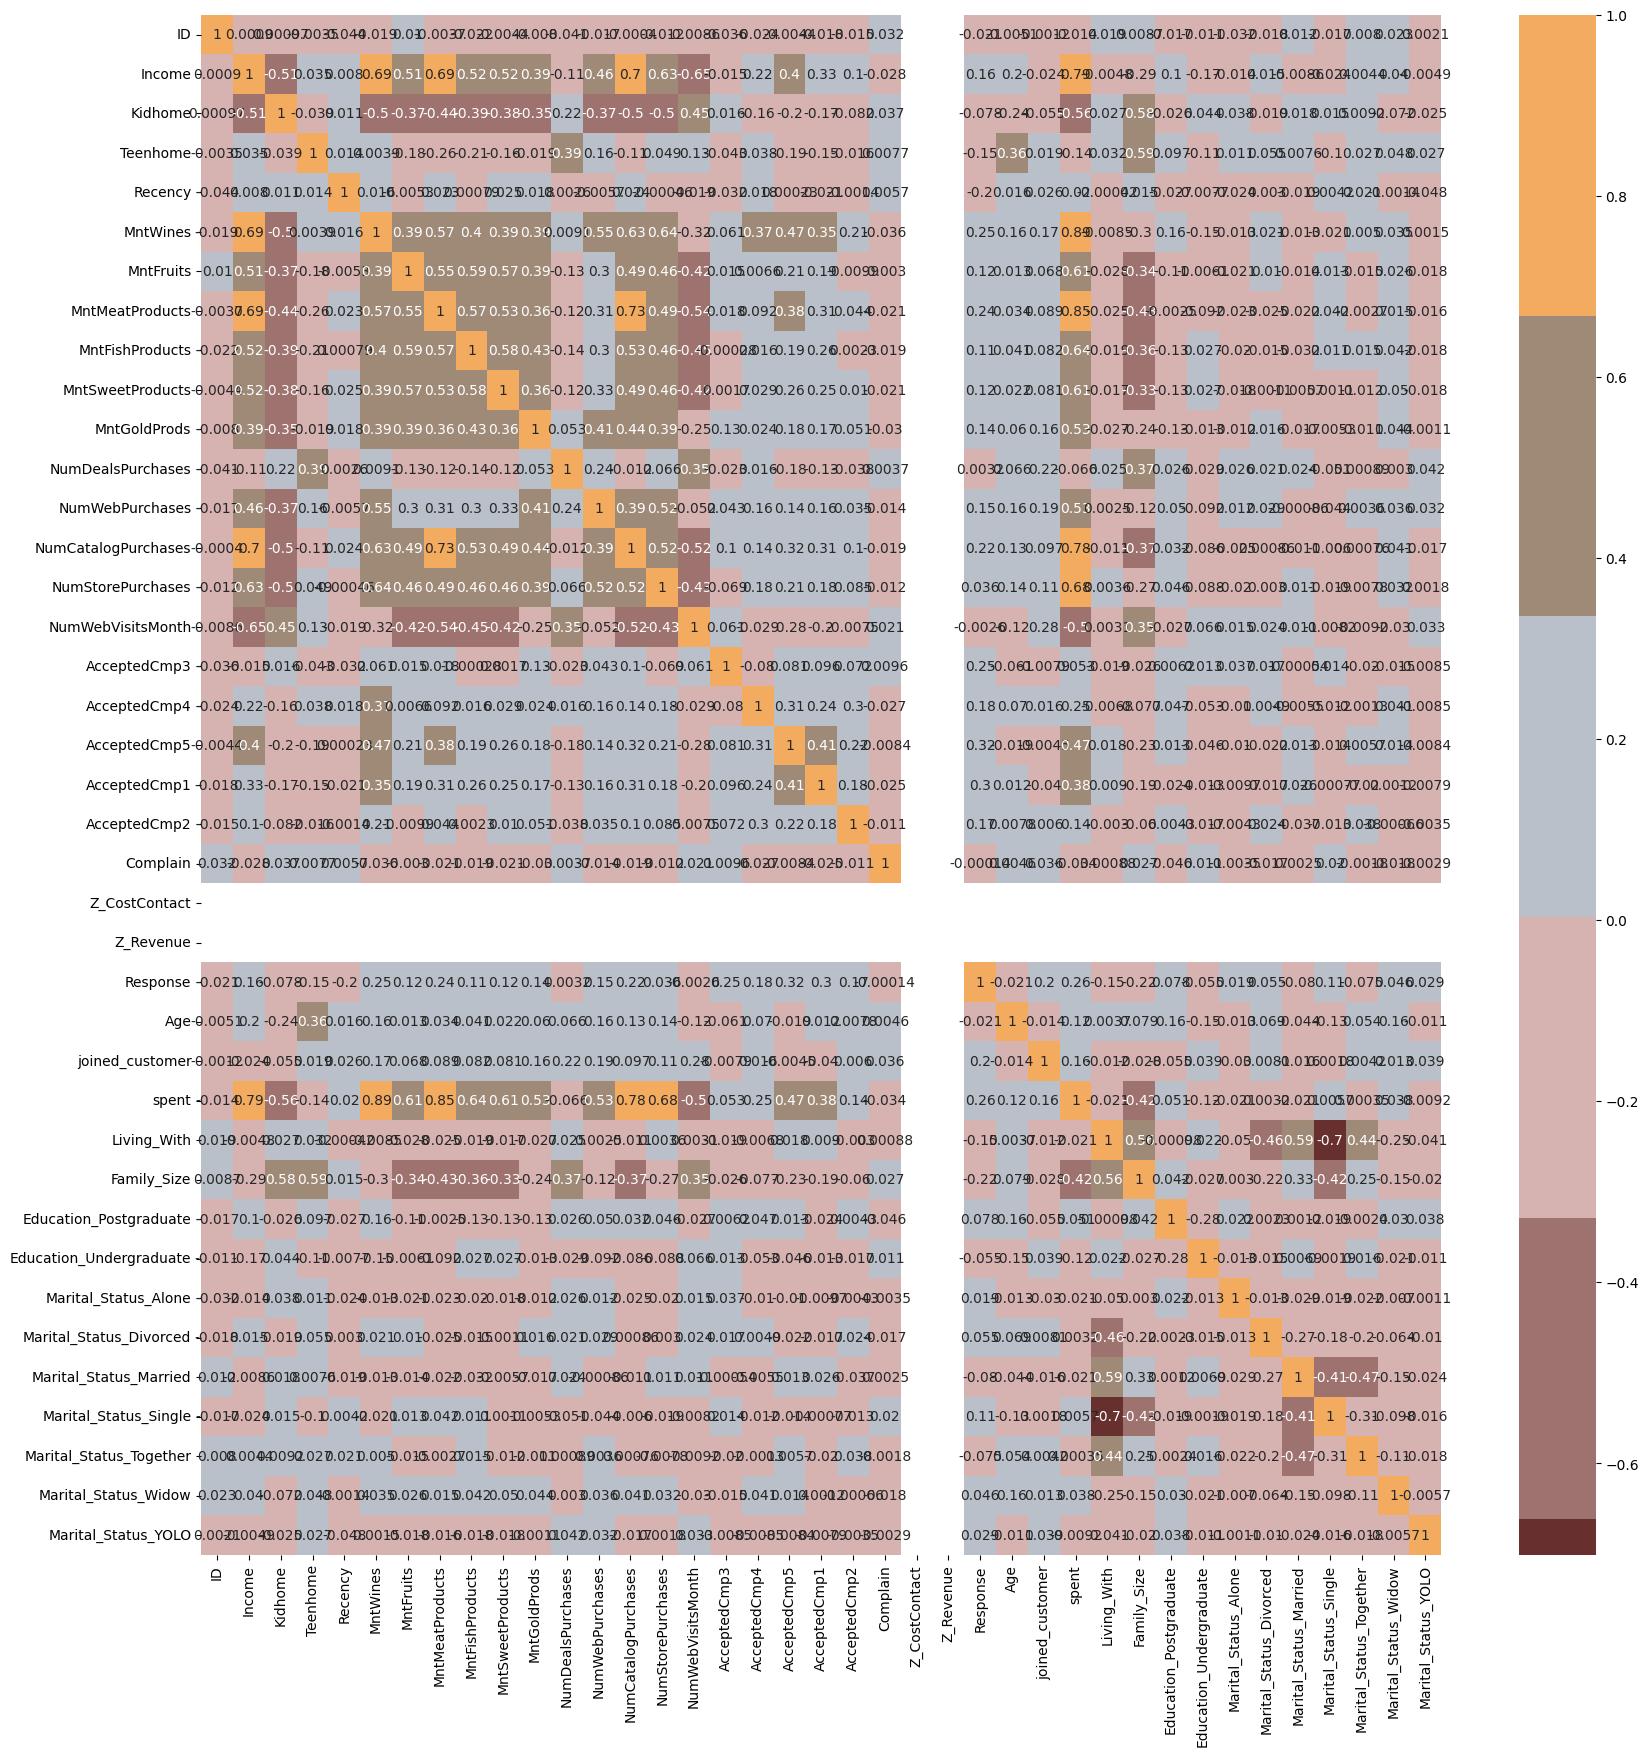

In [25]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= df_encoded.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [27]:
#Get list of categorical variables
s = (df_encoded.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [35]:
ds=df_encoded.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [46]:
exclude_columns = ['joined_customer']  # Replace with actual column names

# Perform scaling on numeric columns only
numeric_cols = [col for col in df.columns if col not in exclude_columns]
scaled_df = df[numeric_cols].copy()

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df), columns=numeric_cols)

C:\Users\shikh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1140: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\shikh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1145: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\shikh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1165: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [47]:
scaled_df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,spent,Living_With,Family_Size
0,-0.018837,NaN,NaN,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,...,-0.261914,-0.117256,-0.09552,0.0,0.0,2.375425,1.018352,1.676245,-1.349603,-1.758359
1,-1.050626,NaN,NaN,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,...,-0.261914,-0.117256,-0.09552,0.0,0.0,-0.420977,1.274785,-0.963297,-1.349603,0.449070
2,-0.444797,NaN,NaN,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,...,-0.261914,-0.117256,-0.09552,0.0,0.0,-0.420977,0.334530,0.280110,0.740959,-0.654644
3,0.183824,NaN,NaN,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,...,-0.261914,-0.117256,-0.09552,0.0,0.0,-0.420977,-1.289547,-0.920135,0.740959,0.449070
4,-0.080437,NaN,NaN,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,...,-0.261914,-0.117256,-0.09552,0.0,0.0,-0.420977,-1.033114,-0.307562,0.740959,0.449070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1.627712,NaN,NaN,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,...,-0.261914,-0.117256,-0.09552,0.0,0.0,-0.420977,0.163575,1.218061,0.740959,0.449070
2208,-0.487916,NaN,NaN,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,...,3.818045,-0.117256,-0.09552,0.0,0.0,-0.420977,1.958607,-0.271040,0.740959,2.656499
2209,0.518925,NaN,NaN,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,...,-0.261914,-0.117256,-0.09552,0.0,0.0,-0.420977,-1.033114,1.052052,-1.349603,-1.758359
2210,0.816141,NaN,NaN,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,...,-0.261914,-0.117256,-0.09552,0.0,0.0,-0.420977,1.103830,0.391336,0.740959,0.449070


In [42]:
print(df_encoded.dtypes)

ID                                   int64
Income                             float64
Kidhome                              int64
Teenhome                             int64
Recency                              int64
MntWines                             int64
MntFruits                            int64
MntMeatProducts                      int64
MntFishProducts                      int64
MntSweetProducts                     int64
MntGoldProds                         int64
NumDealsPurchases                    int64
NumWebPurchases                      int64
NumCatalogPurchases                  int64
NumStorePurchases                    int64
NumWebVisitsMonth                    int64
AcceptedCmp3                         int64
AcceptedCmp4                         int64
AcceptedCmp5                         int64
AcceptedCmp1                         int64
AcceptedCmp2                         int64
Complain                             int64
Z_CostContact                        int64
Z_Revenue  

WHY??

In [48]:
scaled_df.dropna(axis=1,inplace=True)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   float64
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   float64
 3   Teenhome             2212 non-null   float64
 4   Recency              2212 non-null   float64
 5   MntWines             2212 non-null   float64
 6   MntFruits            2212 non-null   float64
 7   MntMeatProducts      2212 non-null   float64
 8   MntFishProducts      2212 non-null   float64
 9   MntSweetProducts     2212 non-null   float64
 10  MntGoldProds         2212 non-null   float64
 11  NumDealsPurchases    2212 non-null   float64
 12  NumWebPurchases      2212 non-null   float64
 13  NumCatalogPurchases  2212 non-null   float64
 14  NumStorePurchases    2212 non-null   float64
 15  NumWebVisitsMonth    2212 non-null   f

In [49]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-8.994212e-17,2.809176,-5.516733,-2.520875,-0.822277,2.247104,8.328659
col2,2212.0,6.424437e-18,1.526423,-3.560372,-1.195972,-0.138672,1.074643,5.475047
col3,2212.0,2.890997e-17,1.383119,-3.321893,-0.675035,-0.138659,0.246226,8.583461


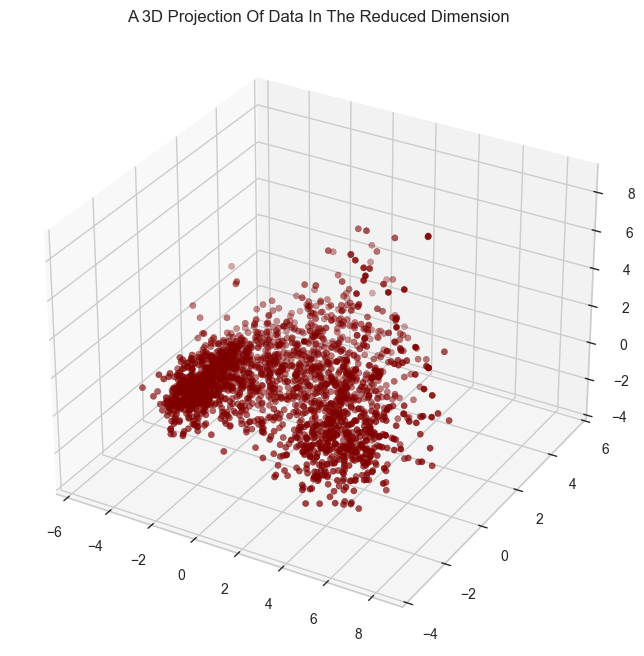

In [53]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

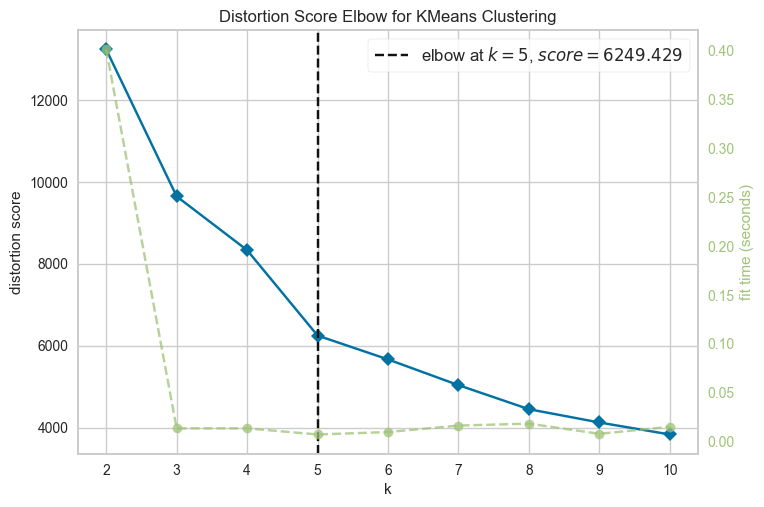

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [51]:
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_encoded["Clusters"]= yhat_AC

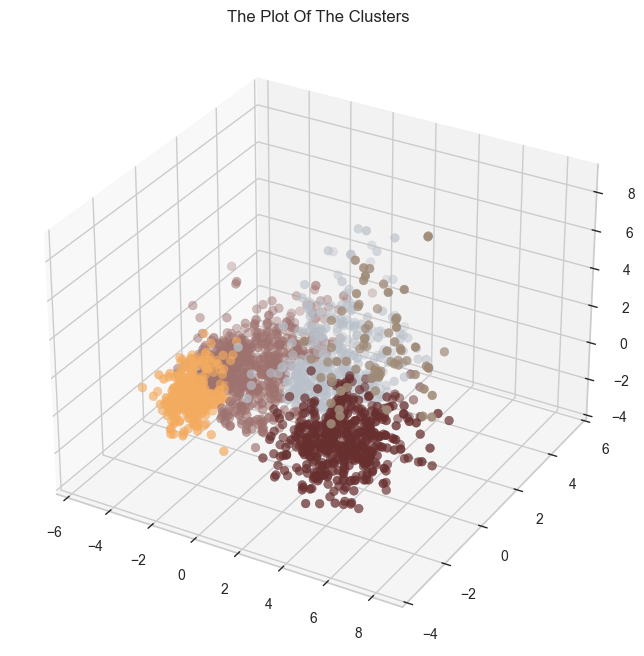

In [54]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_1776\375433477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_encoded["Clusters"], palette= pal)


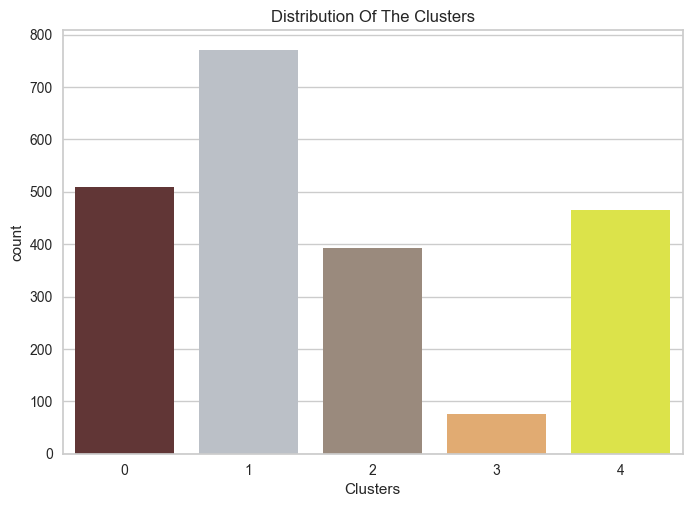

In [55]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#F3FD30"]
pl = sns.countplot(x=df_encoded["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [58]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   ID                       2212 non-null   int64          
 1   Income                   2212 non-null   float64        
 2   Kidhome                  2212 non-null   int64          
 3   Teenhome                 2212 non-null   int64          
 4   Recency                  2212 non-null   int64          
 5   MntWines                 2212 non-null   int64          
 6   MntFruits                2212 non-null   int64          
 7   MntMeatProducts          2212 non-null   int64          
 8   MntFishProducts          2212 non-null   int64          
 9   MntSweetProducts         2212 non-null   int64          
 10  MntGoldProds             2212 non-null   int64          
 11  NumDealsPurchases        2212 non-null   int64          
 12  NumWebPurchases          

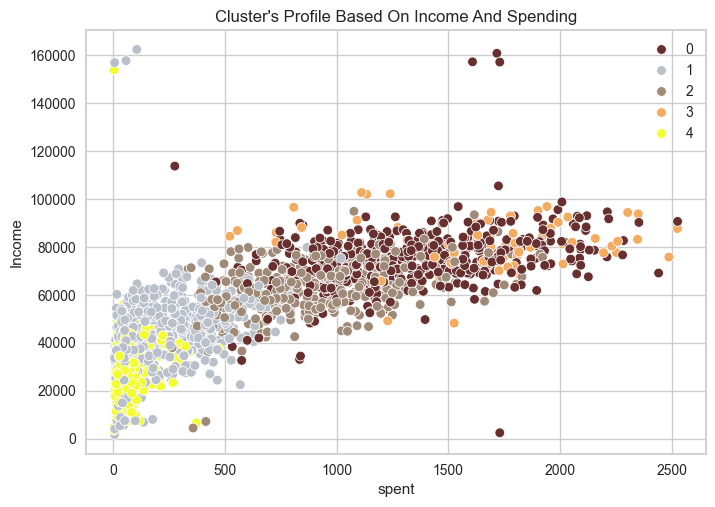

In [59]:
pl = sns.scatterplot(data = df_encoded,x=df_encoded["spent"], y=df_encoded["Income"],hue=df_encoded["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()